In [1]:
from stock import* 
import numpy as np
import akshare as ak
import pandas as pd

In [3]:
import numpy as np
stock_list=["sh600519","sh603517","sh600031",
            "sz000858","sh603816","sh600690",
            "sh600519","sz002493","sh601318",
            "sz000895","sz002415","sh601021",
            "sz000333","sz300413","sz002332"]
#stock_list2=list(stock_zh_a_spot_df['代码'][0:100])
day=70
#RF=RF/30
time = 21 # 持股时长
ExpReturn=[]
ExpCov=[]
stock_in_plan=[]
i=0
for s in stock_list:
    i+=1
    print(i,end=' ') # 显示工作进度
    data = ak.stock_zh_a_daily(symbol=s, adjust="qfq")
    if len(data)>900: # 考察历史900天的数据
        stock_in_plan.append(s)
        k=stock(data,s,day)
        #k.k_plot()
        ExpReturn.append(k.ExpReturn3(time))
        ExpCov.append(k.His_Return2())
ExpReturn=np.array(ExpReturn)#*time
ExpCov=np.array(ExpCov)
ExpCov=np.cov(ExpCov)*time
ExpCov

           5.18

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
13 Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=250.231, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=253.995, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=250.581, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=250.080, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=252.572, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=251.563, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=253.343, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=249.756, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=251.664, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=251.750, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=249.739, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=251.728, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=253.160, Time=0.11 

array([[ 0.01481584,  0.00752154,  0.00743209,  0.01531564,  0.00797314,
         0.00128655,  0.01481584,  0.00615714,  0.00681298,  0.00300311,
         0.00231251,  0.00564218,  0.00365856,  0.00509137,  0.00557878],
       [ 0.00752154,  0.02671881,  0.00623316,  0.01043027,  0.0090804 ,
         0.00131169,  0.00752154,  0.00580992,  0.00248128,  0.00298795,
         0.0023198 ,  0.00506763,  0.00313139,  0.0041455 ,  0.00853657],
       [ 0.00743209,  0.00623316,  0.02153098,  0.0098356 ,  0.00829641,
         0.00234752,  0.00743209,  0.00895574,  0.00673275,  0.00369337,
         0.00412872,  0.00605004,  0.00505132,  0.00519986,  0.00630531],
       [ 0.01531564,  0.01043027,  0.0098356 ,  0.02408218,  0.01111078,
         0.00237124,  0.01531564,  0.00829996,  0.00876608,  0.00388463,
         0.00299108,  0.00760689,  0.00497703,  0.00606155,  0.00743846],
       [ 0.00797314,  0.0090804 ,  0.00829641,  0.01111078,  0.02413509,
         0.0025855 ,  0.00797314,  0.00762842, 

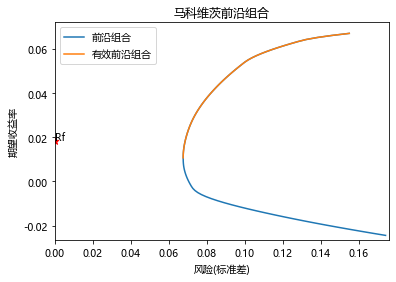

In [4]:
[target_variance, target_returns, PortWts, postive_target_returns, postive_target_variance]=frontcon(ExpReturn, ExpCov , 100)
# 找到满足前沿条件的解（上半直线）
plt.plot(target_variance, target_returns,label='前沿组合')
plt.plot(postive_target_variance, postive_target_returns,label='有效前沿组合')
plt.scatter(0,RF,s=50,marker='*',c='red')
plt.text(0.0001,RF,'Rf')
Min = np.array(target_returns).min()
Max = np.array(target_returns).max()
if RF > Min and RF < Max:
    plt.ylim(Min-0.002,Max+0.005)
elif RF > Max:
    plt.ylim(Min-0.002,RF+0.005)
elif RF < Min:
    plt.ylim(RF-0.002,Max+0.005)
plt.xlim(0,np.array(target_variance).max()+0.002)
plt.title("马科维茨前沿组合")
plt.xlabel("风险(标准差)")
plt.ylabel("期望收益率")
plt.legend()
plt.show()

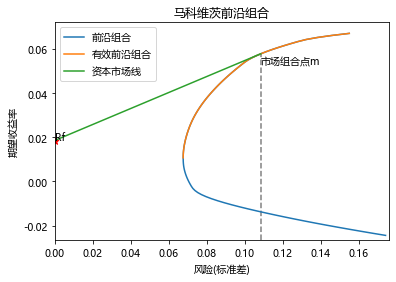

组合的beta系数是0.9999999999999999
组合的sharp比为0.36286425009954654


In [13]:
# 画证券市场线
[M,E_rm]=Get_M(postive_target_returns,postive_target_variance,RF)
x=[0,postive_target_variance[M]]
y=[RF,postive_target_returns[M]]
plt.plot(target_variance, target_returns,label='前沿组合')
plt.plot(postive_target_variance, postive_target_returns,label='有效前沿组合')
plt.plot(x,y,label='资本市场线')

plt.scatter(0,RF,s=50,marker='*',c='red')
plt.text(0.0001,RF,'Rf')

Min = np.array(target_returns).min()
Max = np.array(target_returns).max()
if RF > Min and RF < Max:
    Min = Min-0.002
    Max = Max+0.005
elif RF > Max:
    Min = Min-0.002
    Max = RF+0.005
elif RF < Min:
    Min = RF-0.002
    Max = Max+0.005
plt.ylim(Min,Max)
plt.vlines(postive_target_variance[M],Min,postive_target_returns[M],linestyles = "dashed",color='gray')
plt.text(postive_target_variance[M]+0.0001,postive_target_returns[M]-0.005,'市场组合点m')
plt.xlim(0,np.array(target_variance).max()+0.002)
plt.title("马科维茨前沿组合")
plt.xlabel("风险(标准差)")
plt.ylabel("期望收益率")
plt.legend()
plt.show()

m=len(target_returns)-len(postive_target_returns)+M
Beta=beta(sigma_rp(ExpCov,PortWts,m),target_variance[m])
print('组合的beta系数是%s'%Beta)
Sharp=sharp_rate(target_returns[m],target_variance[m])
print('组合的sharp比为%s'%Sharp)


In [15]:
plan(stock_in_plan,PortWts[m],100000).perchase_plan()

股票sh603816(顾家家居)购买300股
股票sz002493(荣盛石化)购买1600股
股票sh601318(中国平安)购买300股
